<a href="https://colab.research.google.com/github/vicentcamison/idal_ia3/blob/main/3%20Aprendizaje%20profundo%20(II)/Sesion%205/B2-GRU-Time-Series_Ejercicio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![IDAL](https://i.imgur.com/tIKXIG1.jpg)  

#**Máster en Inteligencia Artificial Avanzada y Aplicada:  IA^3**
---

#GRU en series temporales: Ejercicio

Para este ejercicio vamos a utilizar los datos de la Base de Datos Económicos de la Reserva Federal (FRED) relativos a la producción de los servicios públicos de electricidad y gas desde enero de 1992 hasta enero de 2019 (325 registros).

Fuente de datos: https://fred.stlouisfed.org/series/IPG2211A2N

El ejercico consta de las siguientes partes:
* Realizar importaciones estándar, cargar y trazar el conjunto de datos (código proporcionado)
* Preparar los datos para un modelo GRU
* Definir el modelo GRU y las funciones de pérdida y optimización
* Entrenar el modelo
* Evaluar el modelo en datos de prueba
* Graficar los resultados


## Realiza las importaciones estándar, carga y traza el conjunto de datos
Ejecute las celdas siguientes para cargar las bibliotecas necesarias para este ejercicio y el conjunto de datos de producción de energía, y para trazar los datos.

In [ ]:
import torch
import torch.nn as nn
from sklearn.preprocessing import MinMaxScaler

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

df = pd.read_csv('/content/sample_data/Energy_Production.csv',index_col=0,parse_dates=True)
df.dropna(inplace=True)
print(len(df))
df.head()

325


,IPG2211A2N
DATE,
1992-01-01,85.5560
1992-02-01,80.4178
1992-03-01,74.7390
1992-04-01,69.8367
1992-05-01,67.3781


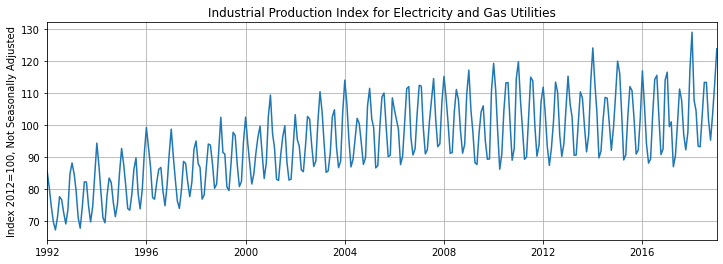

In [ ]:
plt.figure(figsize=(12,4))
plt.title('Industrial Production Index for Electricity and Gas Utilities')
plt.ylabel('Index 2012=100, Not Seasonally Adjusted')
plt.grid(True)
plt.autoscale(axis='x',tight=True)
plt.plot(df['IPG2211A2N'])
plt.show()

## Preparar los datos
Para el primer conjunto de ejercicios vamos a
* dividir los datos en conjuntos de entrenamiento y de prueba
* normalizaremos el conjunto de entrenamiento
* preparar las tuplas de secuencias/etiquetas con ventanas para un modelo GRU

## Dividir los datos en conjuntos de entrenamiento y de prueba
Trabajando con un tamaño de ventana de 12, dividir el conjunto de datos en una secuencia de 313 registros de entrenamiento (incluyendo la ventana), y un conjunto de prueba de 12 registros.

In [ ]:
# Tu código aquí
y = df['IPG2211A2N'].values.astype(float)

test_size = 
window_size = 

train_set = 
test_set = 

SyntaxError: ignored

In [ ]:
print(f'Train: {len(train_set)}')
print(f'Test:  {len(test_set)}')

## Normalizar el conjunto de entrenamiento
Escala el conjunto de entrenamiento para que se ajuste al rango [-1,1].

In [ ]:
# Tu código aquí
scaler = MinMaxScaler(feature_range=(-1, 1))


train_norm = 

In [ ]:
print(f'First item, original: {train_set[0]}')
print(f'First item, scaled:  {train_norm[0]}')

##Preparar los datos para la GRU
Prepare la lista de tuplas de secuencia/etiqueta con ventana para alimentar un modelo GRU.

In [ ]:
train_norm = torch.FloatTensor(train_norm).view(-1)

def input_data(seq,ws):
    out = []
    L = len(seq)
    for i in range(L-ws):
        window = seq[i:i+ws]
        label = seq[i+ws:i+ws+1]
        out.append((window,label))
    return out

In [ ]:
# Tu código aquí

train_data = 

In [ ]:
print(f'Train_data: {len(train_data)}')  

## Definir el modelo
Diseñe un modelo que tenga una capa GRU (1,64) y una capa lineal totalmente conectada (64,1). Asegúrese de inicializar $h_0$, y devolver sólo el último valor predicho.

In [ ]:
# Tu código aquí
class GRUnetwork(nn.Module):
    
    
    
    
    
    
    
    



In [ ]:

torch.manual_seed(101)
model = GRUnetwork()
model

## Definir las funciones de pérdida y optimización
Defina una función de pérdida llamada "criterio" y un optimizador llamado "optimizador".<br>
Puedes utilizar las funciones que quieras, aunque nosotros hemos utilizado MSELoss y Adam (tasa de aprendizaje de 0,001) respectivamente.

In [ ]:
# Tu código aquí




In [ ]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

##Entrena el modelo
No se preocupe por el seguimiento de los valores de pérdida, la visualización de los resultados o la validación del conjunto de pruebas. Simplemente entrene el modelo a través de 50 épocas. Evaluaremos el modelo entrenado en el siguiente paso.

*CONSEJO: imprimir algo después de cada epoch para indicar el progreso del entrenamiento.*

In [ ]:
# Tu código aquí




## Evalúa el modelo utilizando el conjunto de pruebas
Asegúrese de reinicializar los parámetros ocultos $h_0$ antes de ejecutar el modelo.

In [ ]:
# Tu código aquí
future = 
preds = 

model.eval()

for i in range(future):




In [ ]:
preds[window_size:]

## Transformación inversa de los valores predichos
Reescalar los valores predichos hasta el rango original del conjunto de pruebas.

In [ ]:
# Tu código aquí
true_predictions = 

In [ ]:
true_predictions

## Graficar el resultado
Trace los valores de true_predictions junto con los datos originales. Recuerde crear un rango de valores de fecha para los datos predichos.

In [ ]:
# Tu código aquí


In [ ]:
# Tu código aquí 

¿Que te parecen los resultados? ¿Son mejorables? ¿Como? 
Prueba diferentes posibilidades y observa los resultados

Enhorabuena, has llegado al final del cuaderno. 


## Referencias

*   Documento inspirado en el curso UDEMY: DeepLearning con Pytorch de Jose Marcial Portilla.
* Doc oficial Pytorch https://pytorch.org/docs/stable/generated/torch.nn.RNN.html
* https://pytorch.org/tutorials/intermediate/char_rnn_classification_tutorial.html

## Fin del cuaderno